# Logistic regression

In this exercise you will train a logistic regression model via gradient descent in two simple scenarios.
 
The general setup is as follows:
* we are given a set of pairs $(x, y)$, where $x \in R^D$ is a vector of real numbers representing the features, and $y \in \{0,1\}$ is the target,
* for a given $x$ we model the probability of $y=1$ by $h(x):=g(w^Tx)$, where $g$ is the sigmoid function: $g(z) = \frac{1}{1+e^{-z}}$,
* to find the right $w$ we will optimize the so called logarithmic loss: $J(w) = -\frac{1}{n}\sum_{i=1}^n y_i \log{h(x_i)} + (1-y_i) \log{(1-h(x_i))}$,
* with the loss function in hand we can improve our guesses iteratively:
    * $w_j^{t+1} = w_j^t - \text{step_size} \cdot \frac{\partial J(w)}{\partial w_j}$,
* we can end the process after some predefined number of epochs (or when the changes are no longer meaningful).

Let's start with the simplest example - linear separated points on a plane. 

In [130]:
%matplotlib inline

import numpy as np

np.random.seed(123)

# these parametrize the line
a = 0.3
b = -0.2
c = 0.001

# True/False mapping
def lin_rule(x, noise=0.):
    return a * x[0] + b * x[1] + c + noise < 0.

# Just for plotting
def get_y_fun(a, b, c):
    def y(x):
        return - x * a / b - c / b
    return y

lin_fun = get_y_fun(a, b, c)

In [131]:
# Training data

n = 500
range_points = 1
sigma = 0.05

X = range_points * 2 * (np.random.rand(n, 2) - 0.5)
y = [lin_rule(x, sigma * np.random.normal()) for x in X]

print X[:10]
print y[:10]

[[ 0.39293837 -0.42772133]
 [-0.54629709  0.10262954]
 [ 0.43893794 -0.15378708]
 [ 0.9615284   0.36965948]
 [-0.0381362  -0.21576496]
 [-0.31364397  0.45809941]
 [-0.12285551 -0.88064421]
 [-0.20391149  0.47599081]
 [-0.63501654 -0.64909649]
 [ 0.06310275  0.06365517]]
[False, True, False, False, False, True, False, True, True, False]


Let's plot the data.

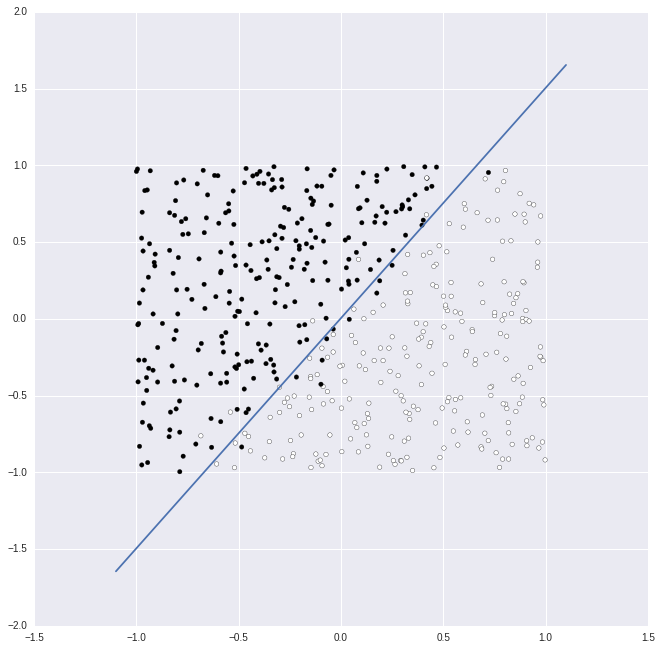

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

range_plot = 1.1
h = .002

plt.figure(figsize=(11,11))

plt.scatter(X[:, 0], X[: , 1], c=y)

_x = np.linspace(-range_plot, range_plot, 1000)
_y = lin_fun(_x)

plt.plot(_x, _y)

Now, let's implement and train a logistic regression model.

In [156]:
################################################################
# TODO: Implement logistic regression and compute its accuracy #
################################################################

def log_regr(x, y, lr=0.03  , n=10000):
    x = np.array(x)
    y = np.array(y).astype(np.float)
    w = np.random.rand(len(x[0]))
    
    def h(x):
        return 1. / (1. + np.exp(-np.sum(w * x, axis=1)))
    
    def loss(hx, y):
        return -np.average(y*np.log(hx)+(1.-y)*np.log(1.-hx))
    
    for nr in range(n):
        hx = h(x)
        
            
        grad = np.average((hx - y) * x.T, axis=1)
        w -= grad * lr
    print loss(hx, y), w
    return w


Xext = np.concatenate((np.array(X), np.ones((len(X), 1))), axis=1)
est_w = log_regr(Xext, y)

0.543839824229 [ 0.94630878  0.68899409 -1.07625417]


Let's visually asses our model. We can do this by using our estimates for $a,b,c$.

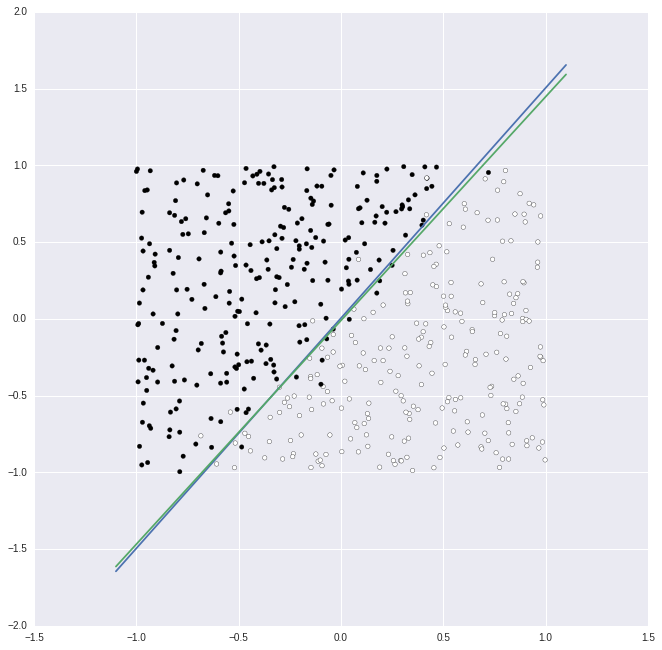

In [144]:
plt.figure(figsize=(11,11))

#################################################################
# TODO: Pass your estimates for a,b,c to the get_y_fun function #
#################################################################

lin_fun2 = get_y_fun(*est_w)

_y2 = lin_fun2(_x)

plt.close()
plt.figure(figsize=(11,11))
plt.scatter(X[:, 0], X[: , 1], c=y)
plt.plot(_x, _y, _x, _y2)

Let's now complicate the things a little bit and make our next problem nonlinear.

In [124]:
# Parameters of the ellipse
s1 = 1.
s2 = 2.
r = 0.75
m1 = 0.15
m2 = 0.125

# True/False mapping, checks whether we are inside the ellipse
def circle_rule(x, noise=0.):
    return s1 * (x[0] - m1) ** 2 + s2 * (x[1] - m2) ** 2 + noise < r ** 2.

In [173]:
# Training data

n = 500
range_points = 1

sigma = 0.1

X = range_points * 2 * (np.random.rand(n, 2) - 0.5)

y = [circle_rule(x, sigma * np.random.normal()) for x in X]

print X[:10]
print y[:10]

[[-0.003026    0.19421877]
 [-0.31848979  0.42223232]
 [ 0.16266734  0.68082764]
 [ 0.72696714 -0.87551525]
 [ 0.29296066  0.44522217]
 [-0.71475554  0.76689686]
 [ 0.71294841 -0.72101527]
 [ 0.76656497  0.29328539]
 [ 0.57356665  0.59710181]
 [-0.67633593 -0.87465523]]
[True, True, False, False, True, False, False, False, False, False]


Let's plot the data.

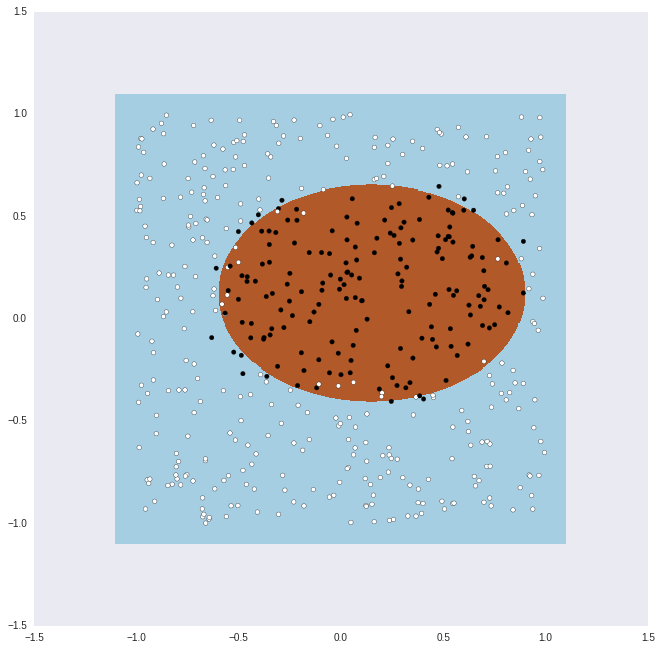

In [174]:
range_plot = 1.1
h = .005

plt.figure(figsize=(11,11))

xx, yy = np.meshgrid(np.arange(-range_plot, range_plot, h), np.arange(-range_plot, range_plot, h))
Z = np.array(map(circle_rule, np.c_[xx.ravel(), yy.ravel()]))

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[: , 1], c=y)

Now, let's train a logistic regression model to tackle this problem. Note that we now need a nonlinear decision boundary. 

Hint: 
<sub><sup><sub><sup><sub><sup>
Use feature engineering.
</sup></sub></sup></sub></sup></sub>

In [157]:
################################################################
# TODO: Implement logistic regression and compute its accuracy #
################################################################

0.543839824229 [ 0.9463089   0.68899419 -1.0762542 ]


Let's visually asses our model. 

Contrary to the previous scenario, converting our weights to parameters of the ground truth curve may not be straightforward. It's easier to just provide predictions for a set of points in $R^2$.

In [212]:
range_plot = 1.1
h = .005

xx, yy = np.meshgrid(np.arange(-range_plot, range_plot, h), np.arange(-range_plot, range_plot, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]


############################################################
# TODO: Compute true/false predictions for the X_plot data #
############################################################

def ext_features(x):
    return np.concatenate((np.array(x), 
                           (x[:,0]**2).reshape(-1,1),
                           (x[:,1]**2).reshape(-1,1), 
                           # (x[:,0]).reshape(-1,1),
                           # (x[:,1]).reshape(-1,1), 
                           np.ones((len(x), 1))
                           ), axis=1)

est_w = log_regr(ext_features(X), y, lr=0.1, n=10000)
preds = np.sum(ext_features(X_plot) * est_w, axis=1) < 0
print preds.shape, preds

0.165104552231 [  2.15645015   3.3572851   -7.12984995 -12.53483353   3.47636339]
(193600,) [ True  True  True ...,  True  True  True]


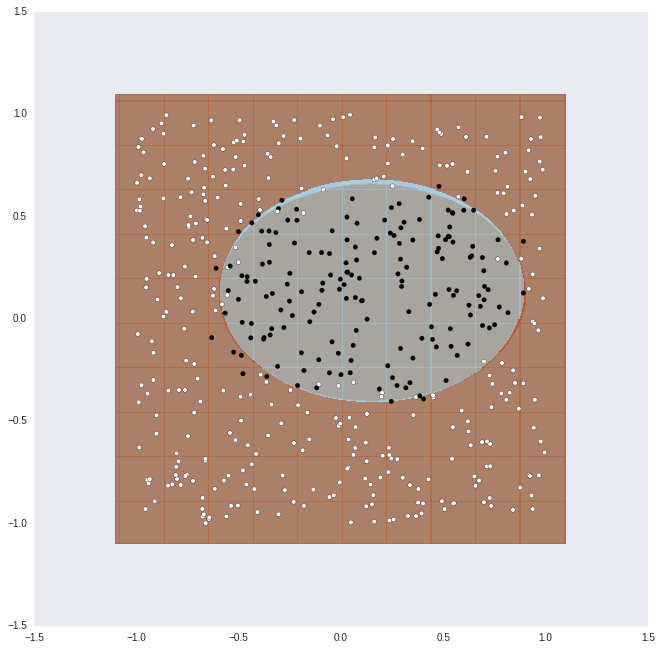

In [211]:
plt.figure(figsize=(11,11))

Z = preds
Z = np.array(Z).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

Z = np.array(map(circle_rule, X_plot))
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, alpha=0.1, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[: , 1], c=y)